In [291]:
import lidarpy as ld
import importlib
importlib.reload(ld);
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

import matplotlib.pyplot as plt
import numpy as np

In [292]:
#fname = './points_lrg.las'
fname = './points_fray_farm.laz'
#fname = './USGS_LPC_VA_ChesapeakeBay_2015_LAS_S13_4993_30.laz'
ldr = ld.lidar(fname)

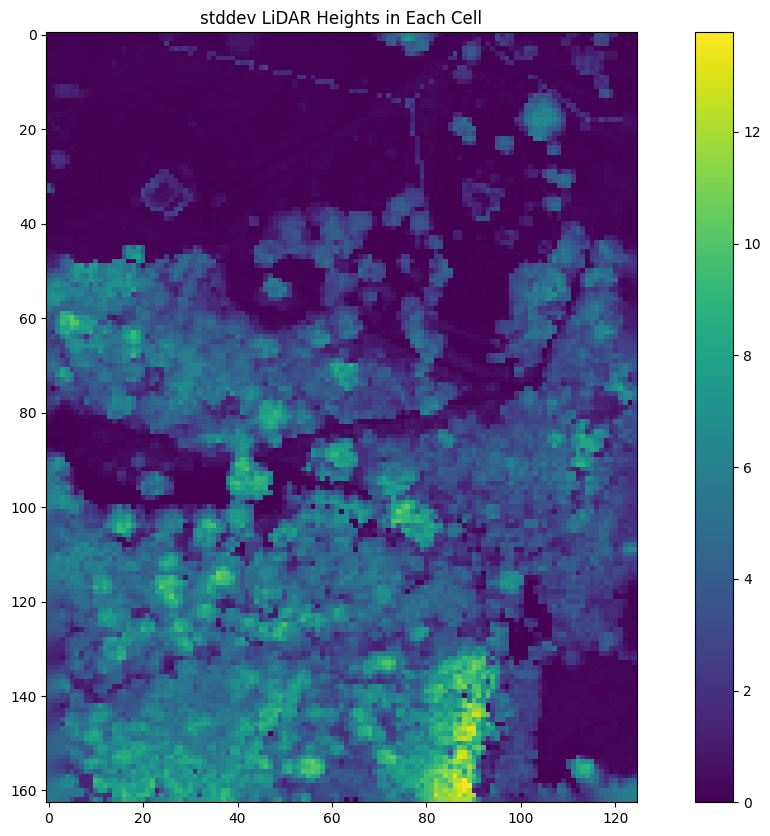

In [293]:
ldr.show_im(3)

In [294]:
ldr.save_png('fray_farm')
ldr.save_tiff('fray_farm')

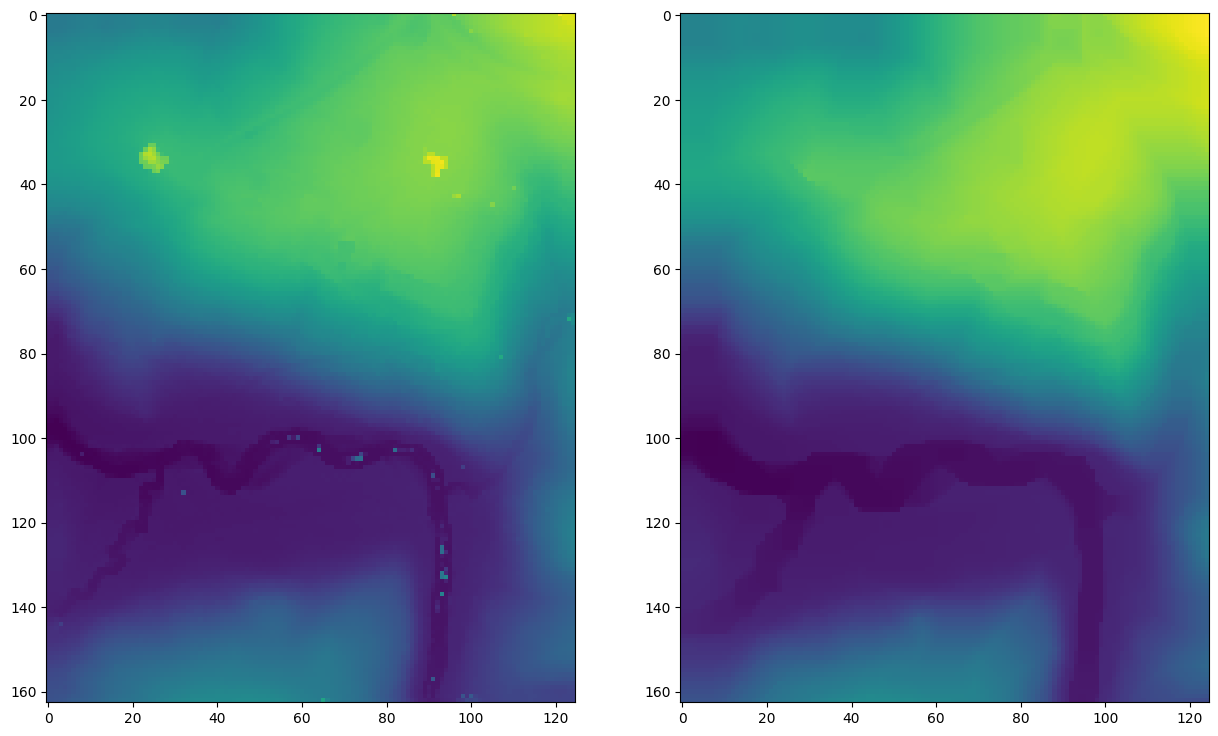

In [295]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ldr.grid_min);
ax2.imshow(ldr.dem);

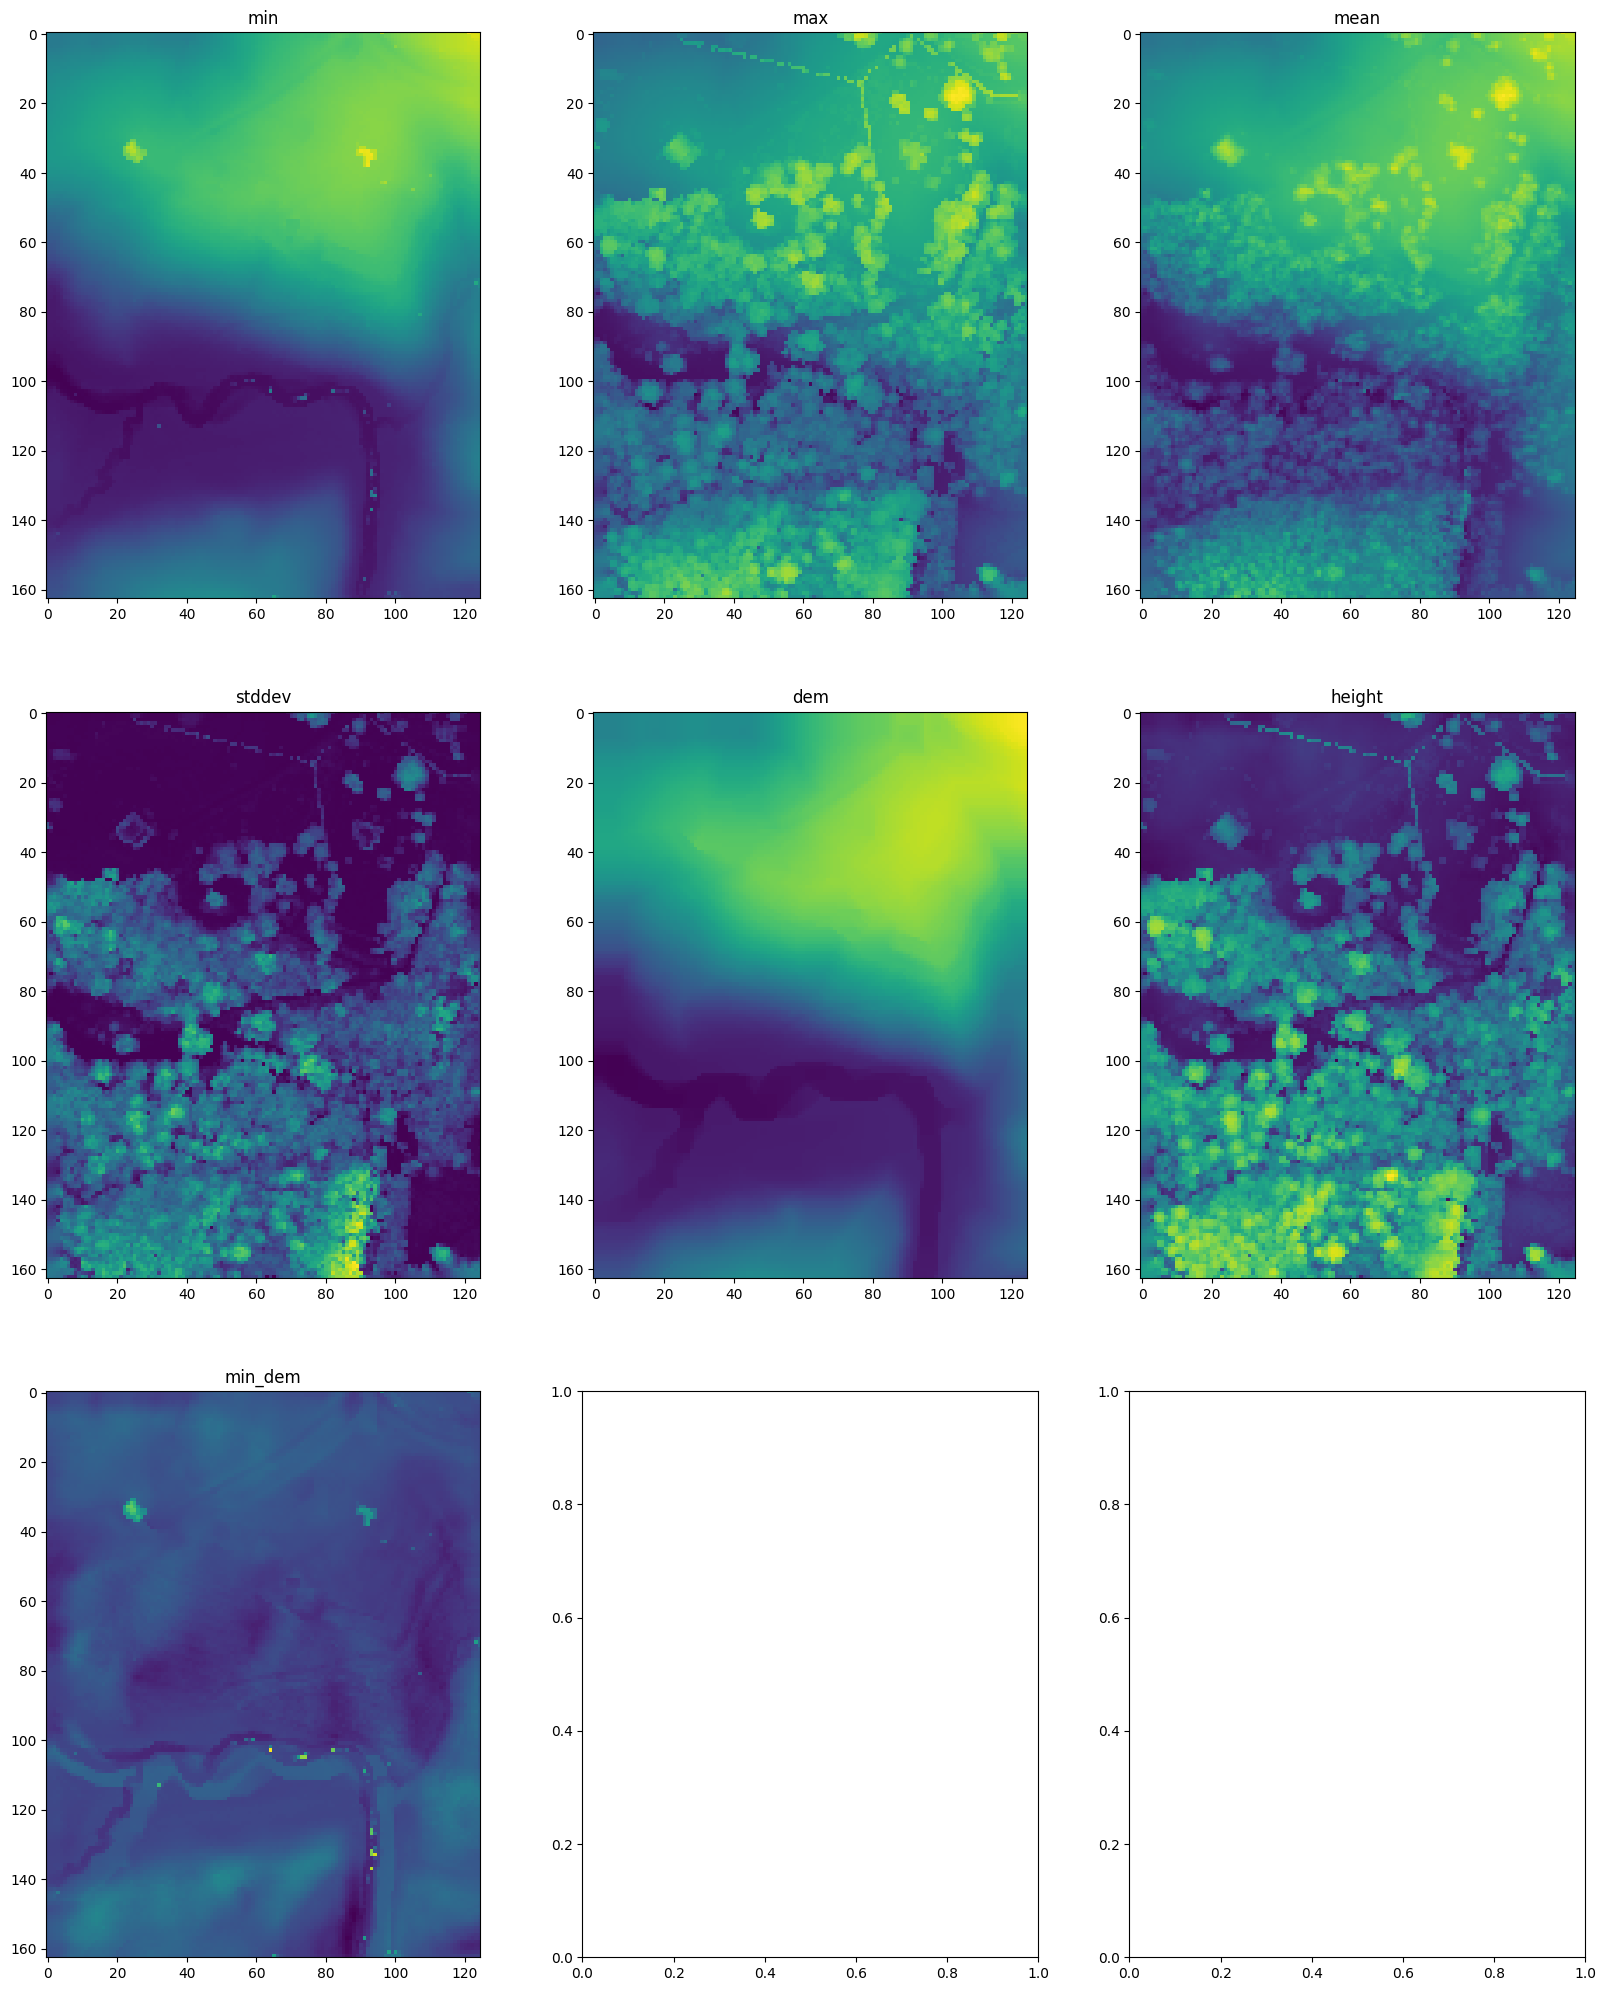

In [301]:
nRows = int(np.ceil(ldr.nFeatures/3))
matplotlib.rcParams['figure.figsize'] = (20,25)
fig, axs = plt.subplots(nRows, 3)
for idx,ax in enumerate(axs.ravel()):
    if idx < ldr.nFeatures:
        ax.imshow(ldr.features[idx]);
        ax.set_title(ldr.feature_names[idx])